In [1]:
import pandas as pd
import scipy.io
import numpy as np
import h5py
import pickle
from sklearn.model_selection import train_test_split

X_test = pd.read_pickle('/Users/prashantronad/Documents/College/6thsem/IDP/Alsnet/X_test.pkl')
y_test = pd.read_pickle('/Users/prashantronad/Documents/College/6thsem/IDP/Alsnet/y_test.pkl')

X_test= np.array(X_test)
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [2]:
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense, BatchNormalization, Input, Lambda, Activation, Conv2D, MaxPooling2D, Reshape, Bidirectional, TimeDistributed, GRU, GlobalMaxPooling1D
from keras.layers import concatenate
from keras.models import Model
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, CSVLogger, EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot


# load model

model= load_model('/Users/prashantronad/Documents/College/6thsem/IDP/Alsnet/ALSNet3.hdf5')

# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=1)
#yhat_probs= 1-yhat_probs

# measure best fscore
#y_test=1-y_test
precision, recall, thresholds = precision_recall_curve(y_test, yhat_probs)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
#print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], fscore[ix], precision[ix], recall[ix]))


# predict classes for threshold
yhat_classes = yhat_probs >= 0.5
cm = confusion_matrix(y_test,yhat_classes)
tn, fp, fn, tp = cm.ravel()

model_precision= tp/(tp+fp)
model_recall= tp/(tp+fn)
model_f= 2*model_precision*model_recall/(model_precision+model_recall)
model_accuracy= (tp+tn)/(tp+fp+tn+fn)
model_sensitivity= model_recall
model_specificity= tn/(tn+fp)

# print('Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (0.5, model_f, model_precision, model_recall))
print('Accuracy=%f, Sensitivity=%f, Specificity=%f' % (model_accuracy, model_sensitivity, model_specificity))
print('Confusion matrix : \n',cm)

/Users/prashantronad/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/prashantronad/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 535ms/step
Accuracy=0.977444, Sensitivity=0.967742, Specificity=0.985915
Confusion matrix : 
 [[350   5]
 [ 10 300]]


In [5]:
import scipy.io as sio
# Create a dictionary
adict = {}
adict['precision'] = precision
sio.savemat('./precision.mat', adict)

# Create a dictionary
adict = {}
adict['recall'] = recall
sio.savemat('./recall.mat', adict)

# Create a dictionary
adict = {}
adict['thresholds'] = precision
sio.savemat('./thresholds.mat', adict)

In [6]:
print(tn, fp, fn, tp)
print((y_test).value_counts())

350 5 10 300
0
0    355
1    310
Name: count, dtype: int64


Text(0.5, 0, 'test set samples')

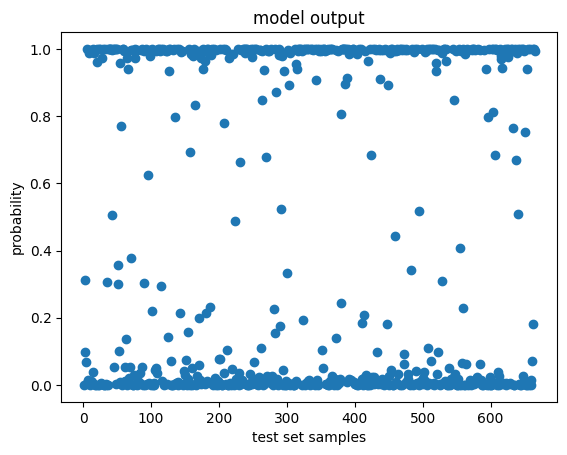

In [7]:
samples= np.arange(1,666,1)
plt.scatter(samples,yhat_probs)
plt.title('model output')
plt.ylabel('probability')
plt.xlabel('test set samples')

In [8]:
import scipy.io as sio
# Create a dictionary
adict = {}
adict['yhat_probs'] = yhat_probs
sio.savemat('./yhat_probs.mat', adict)

# Create a dictionary
y_test= np.array(y_test)
adict = {}
adict['y_test'] = y_test
sio.savemat('./y_test.mat', adict)

/Users/prashantronad/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 44s 517ms/step
Accuracy=0.995107, Sensitivity=0.994819, Specificity=0.995406
Confusion matrix : 
 [[1300    6]
 [   7 1344]]


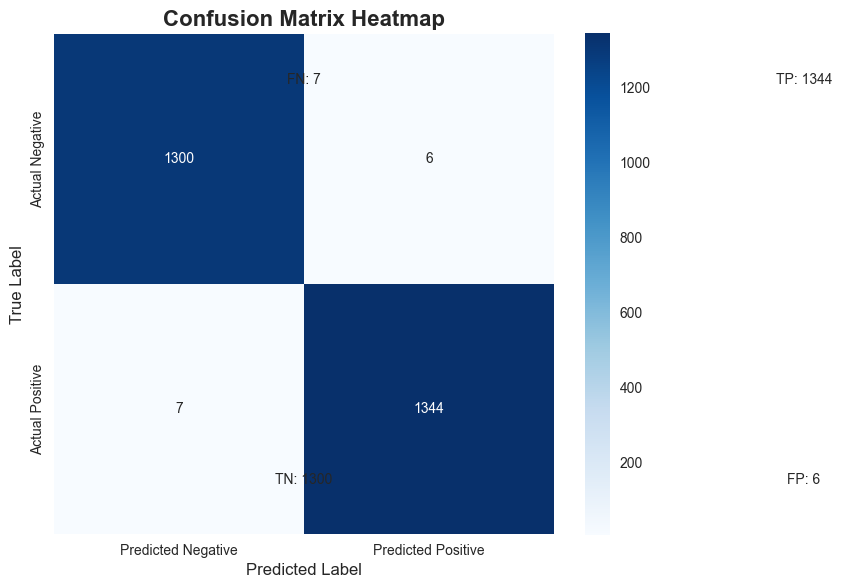

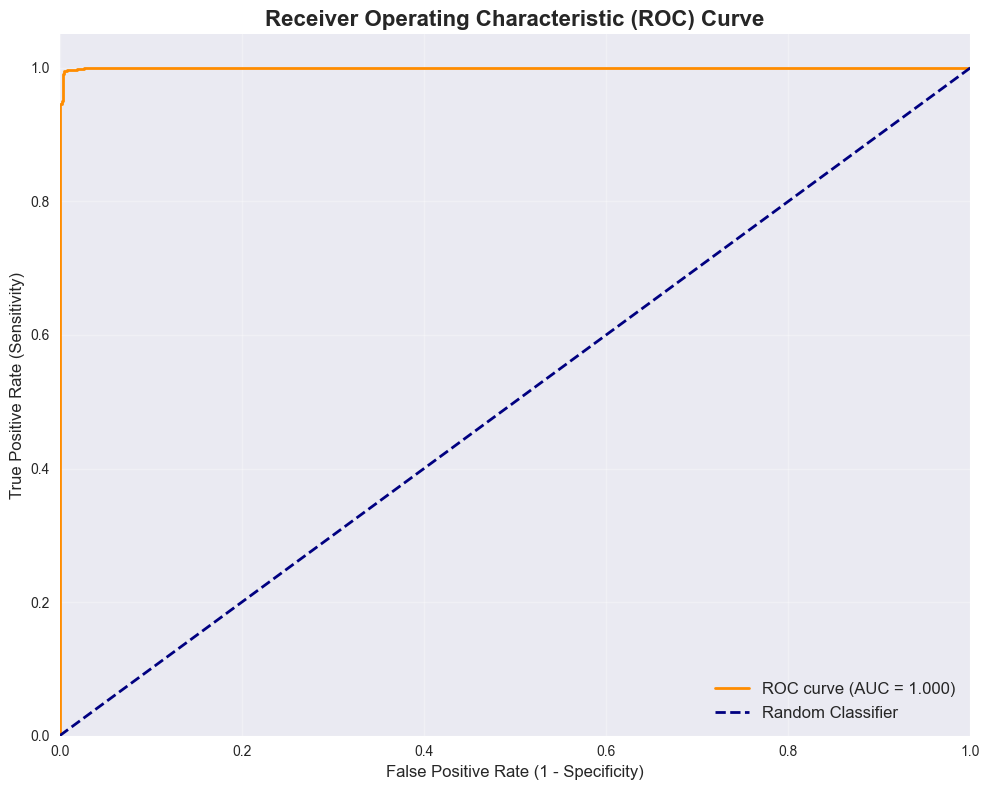

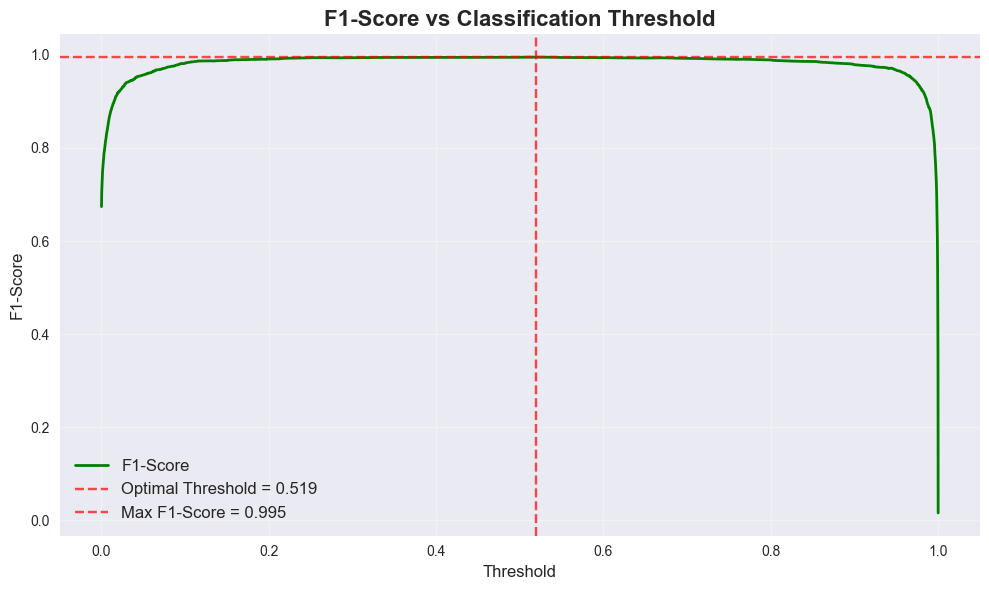

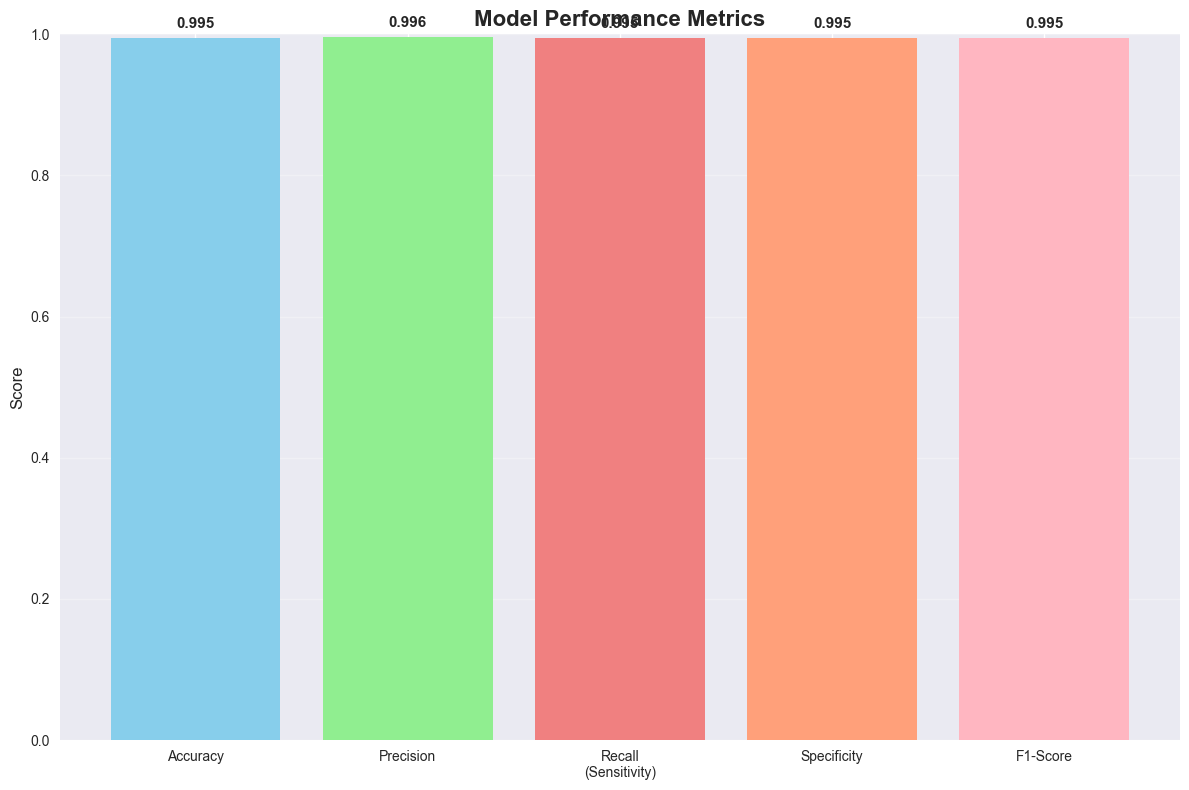

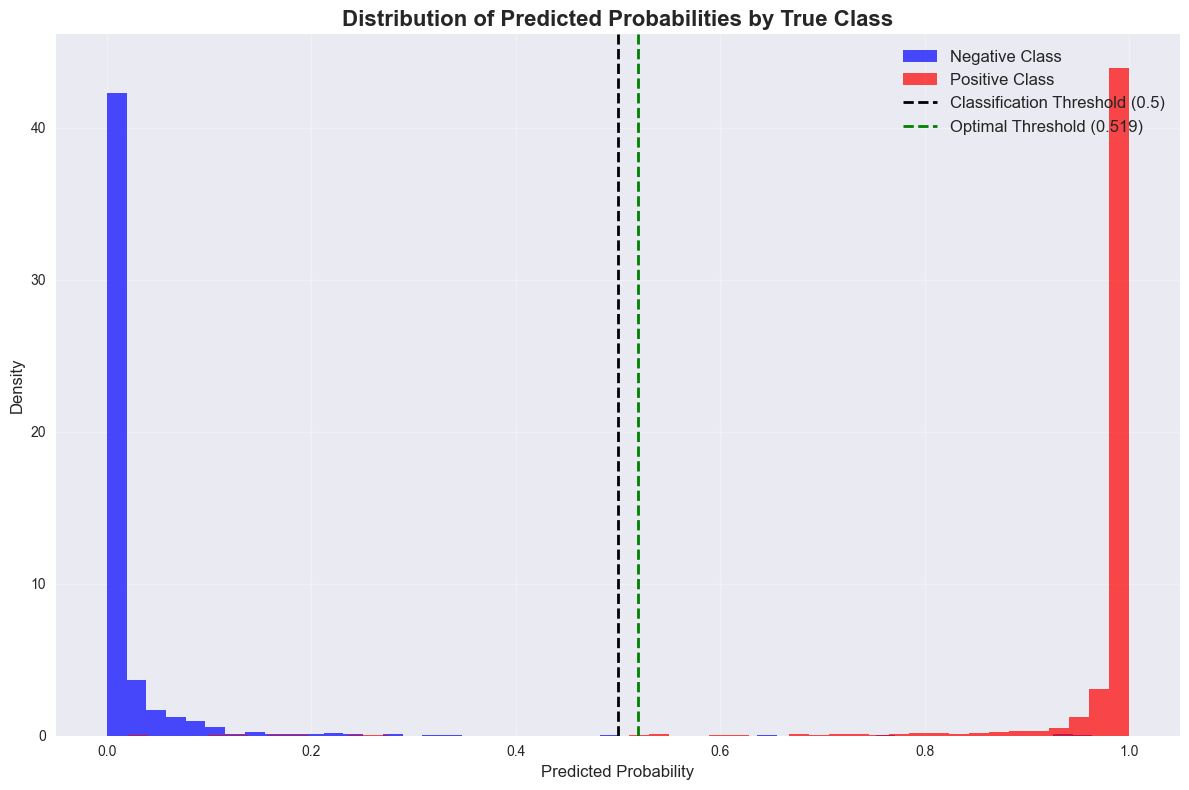

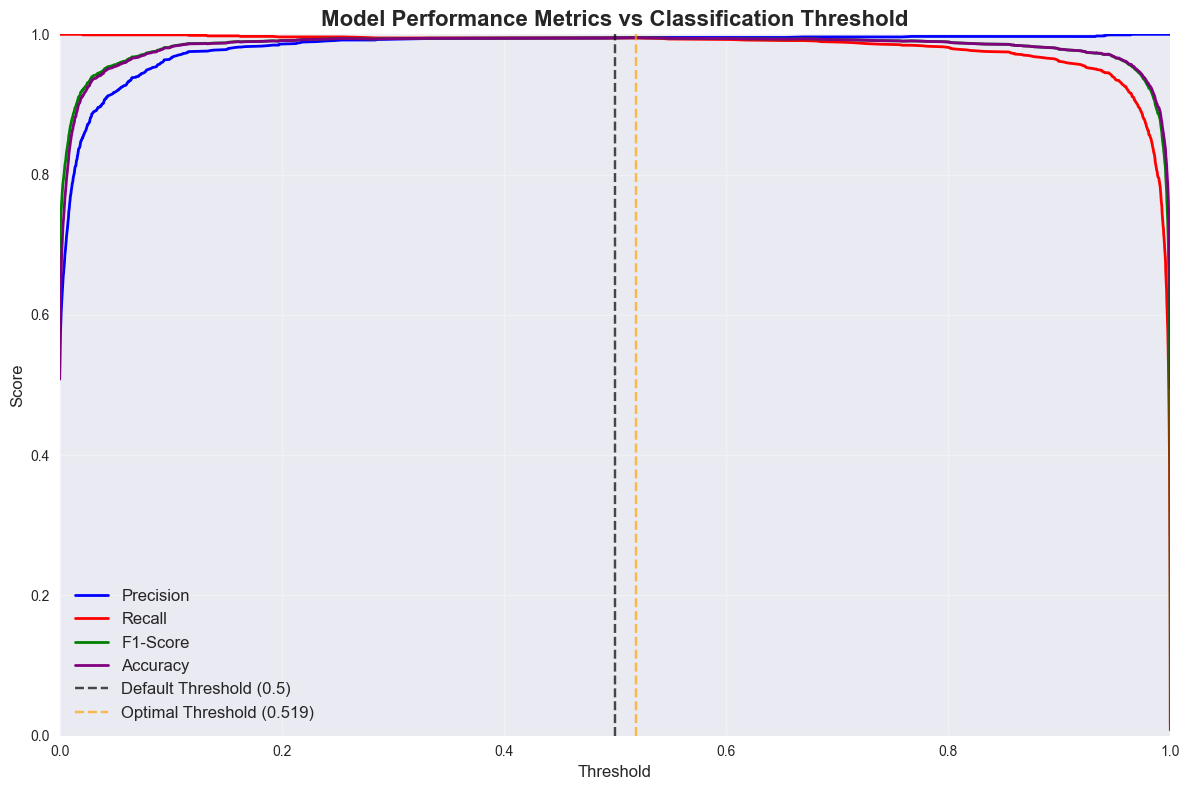


COMPREHENSIVE MODEL ANALYSIS REPORT

📊 BASIC METRICS:
   • Accuracy:     0.9951 (99.51%)
   • Precision:    0.9956 (99.56%)
   • Recall:       0.9948 (99.48%)
   • Specificity:  0.9954 (99.54%)
   • F1-Score:     0.9952

🎯 OPTIMAL THRESHOLD ANALYSIS:
   • Default Threshold (0.5):  F1=0.9952
   • Optimal Threshold (0.519): F1=0.9952
   • Improvement in F1-Score: 0.0000

📈 AREA UNDER CURVES:
   • ROC AUC:      0.9996


NameError: name 'pr_auc' is not defined

In [2]:
import pandas as pd
import scipy.io
import numpy as np
import h5py
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense, BatchNormalization, Input, Lambda, Activation, Conv2D, MaxPooling2D, Reshape, Bidirectional, TimeDistributed, GRU, GlobalMaxPooling1D
from keras.layers import concatenate
from keras.models import Model
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, CSVLogger, EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc
from matplotlib import pyplot
import seaborn as sns

# Your existing code (assuming this runs successfully)
X_test = pd.read_pickle('X_train.pkl')
y_test = pd.read_pickle('y_train.pkl')
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = load_model('ALSNet3.hdf5')
yhat_probs = model.predict(X_test, verbose=1)

# Calculate metrics
precision, recall, thresholds = precision_recall_curve(y_test, yhat_probs)
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)

yhat_classes = yhat_probs >= 0.5
cm = confusion_matrix(y_test, yhat_classes)
tn, fp, fn, tp = cm.ravel()

model_precision = tp/(tp+fp)
model_recall = tp/(tp+fn)
model_f = 2*model_precision*model_recall/(model_precision+model_recall)
model_accuracy = (tp+tn)/(tp+fp+tn+fn)
model_sensitivity = model_recall
model_specificity = tn/(tn+fp)

print('Accuracy=%f, Sensitivity=%f, Specificity=%f' % (model_accuracy, model_sensitivity, model_specificity))
print('Confusion matrix : \n', cm)

# =============================================================================
# COMPREHENSIVE VISUALIZATIONS AND ANALYSIS
# =============================================================================

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

# 1. CONFUSION MATRIX HEATMAP
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)

# Add text annotations for clarity
plt.text(0.5, 0.1, f'TN: {tn}', transform=plt.gca().transAxes, ha='center', fontsize=10)
plt.text(1.5, 0.1, f'FP: {fp}', transform=plt.gca().transAxes, ha='center', fontsize=10)
plt.text(0.5, 0.9, f'FN: {fn}', transform=plt.gca().transAxes, ha='center', fontsize=10)
plt.text(1.5, 0.9, f'TP: {tp}', transform=plt.gca().transAxes, ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# 2. ROC CURVE
fpr, tpr, roc_thresholds = roc_curve(y_test, yhat_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. PRECISION-RECALL CURVE

# 4. F1-SCORE vs THRESHOLD
plt.figure(figsize=(10, 6))
plt.plot(thresholds, fscore[:-1], color='green', lw=2, label='F1-Score')
plt.axvline(x=thresholds[ix], color='red', linestyle='--', alpha=0.7, 
           label=f'Optimal Threshold = {thresholds[ix]:.3f}')
plt.axhline(y=fscore[ix], color='red', linestyle='--', alpha=0.7, 
           label=f'Max F1-Score = {fscore[ix]:.3f}')
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.title('F1-Score vs Classification Threshold', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. METRICS COMPARISON BAR CHART
metrics_names = ['Accuracy', 'Precision', 'Recall\n(Sensitivity)', 'Specificity', 'F1-Score']
metrics_values = [model_accuracy, model_precision, model_recall, model_specificity, model_f]

plt.figure(figsize=(12, 8))
bars = plt.bar(metrics_names, metrics_values, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])
plt.ylim([0, 1])
plt.ylabel('Score', fontsize=12)
plt.title('Model Performance Metrics', fontsize=16, fontweight='bold')

# Add value labels on bars
for bar, value in zip(bars, metrics_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# 6. PROBABILITY DISTRIBUTION
plt.figure(figsize=(12, 8))
plt.hist(yhat_probs[y_test == 0], bins=50, alpha=0.7, label='Negative Class', color='blue', density=True)
plt.hist(yhat_probs[y_test == 1], bins=50, alpha=0.7, label='Positive Class', color='red', density=True)
plt.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Classification Threshold (0.5)')
plt.axvline(x=thresholds[ix], color='green', linestyle='--', linewidth=2, 
           label=f'Optimal Threshold ({thresholds[ix]:.3f})')
plt.xlabel('Predicted Probability', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Predicted Probabilities by True Class', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 7. THRESHOLD ANALYSIS - Multiple Metrics
plt.figure(figsize=(12, 8))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue', linewidth=2)
plt.plot(thresholds, recall[:-1], label='Recall', color='red', linewidth=2)
plt.plot(thresholds, fscore[:-1], label='F1-Score', color='green', linewidth=2)

# Calculate accuracy for different thresholds
accuracies = []
for thresh in thresholds:
    y_pred_thresh = (yhat_probs >= thresh).astype(int)
    cm_thresh = confusion_matrix(y_test, y_pred_thresh)
    tn_t, fp_t, fn_t, tp_t = cm_thresh.ravel()
    acc_t = (tp_t + tn_t) / (tp_t + fp_t + tn_t + fn_t)
    accuracies.append(acc_t)

plt.plot(thresholds, accuracies, label='Accuracy', color='purple', linewidth=2)
plt.axvline(x=0.5, color='black', linestyle='--', alpha=0.7, label='Default Threshold (0.5)')
plt.axvline(x=thresholds[ix], color='orange', linestyle='--', alpha=0.7, 
           label=f'Optimal Threshold ({thresholds[ix]:.3f})')

plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model Performance Metrics vs Classification Threshold', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

# =============================================================================
# DETAILED ANALYSIS AND INSIGHTS
# =============================================================================

print("\n" + "="*80)
print("COMPREHENSIVE MODEL ANALYSIS REPORT")
print("="*80)

print(f"\n📊 BASIC METRICS:")
print(f"   • Accuracy:     {model_accuracy:.4f} ({model_accuracy*100:.2f}%)")
print(f"   • Precision:    {model_precision:.4f} ({model_precision*100:.2f}%)")
print(f"   • Recall:       {model_recall:.4f} ({model_recall*100:.2f}%)")
print(f"   • Specificity:  {model_specificity:.4f} ({model_specificity*100:.2f}%)")
print(f"   • F1-Score:     {model_f:.4f}")

print(f"\n🎯 OPTIMAL THRESHOLD ANALYSIS:")
print(f"   • Default Threshold (0.5):  F1={model_f:.4f}")
print(f"   • Optimal Threshold ({thresholds[ix]:.3f}): F1={fscore[ix]:.4f}")
print(f"   • Improvement in F1-Score: {fscore[ix] - model_f:.4f}")

print(f"\n📈 AREA UNDER CURVES:")
print(f"   • ROC AUC:      {roc_auc:.4f}")
print(f"   • PR AUC:       {pr_auc:.4f}")

print(f"\n🔍 CONFUSION MATRIX BREAKDOWN:")
print(f"   • True Negatives  (TN): {tn:4d}")
print(f"   • False Positives (FP): {fp:4d}")
print(f"   • False Negatives (FN): {fn:4d}")
print(f"   • True Positives  (TP): {tp:4d}")
print(f"   • Total Samples:        {tn+fp+fn+tp:4d}")

print(f"\n📊 CLASS DISTRIBUTION:")
positive_samples = sum(y_test)
negative_samples = len(y_test) - positive_samples
print(f"   • Positive Class: {positive_samples:4d} ({positive_samples/len(y_test)*100:.2f}%)")
print(f"   • Negative Class: {negative_samples:4d} ({negative_samples/len(y_test)*100:.2f}%)")
print(f"   • Class Balance:  {min(positive_samples, negative_samples)/max(positive_samples, negative_samples):.3f}")

print(f"\n⚠️  ERROR ANALYSIS:")
print(f"   • False Positive Rate: {fp/(fp+tn):.4f} ({fp/(fp+tn)*100:.2f}%)")
print(f"   • False Negative Rate: {fn/(fn+tp):.4f} ({fn/(fn+tp)*100:.2f}%)")
print(f"   • Type I Error (FP):   {fp} samples")
print(f"   • Type II Error (FN):  {fn} samples")

print(f"\n🎯 MODEL PERFORMANCE INTERPRETATION:")
if model_accuracy > 0.9:
    print("   • Excellent accuracy performance")
elif model_accuracy > 0.8:
    print("   • Good accuracy performance")
elif model_accuracy > 0.7:
    print("   • Moderate accuracy performance")
else:
    print("   • Poor accuracy performance")

if roc_auc > 0.9:
    print("   • Excellent discrimination ability (ROC AUC)")
elif roc_auc > 0.8:
    print("   • Good discrimination ability (ROC AUC)")
elif roc_auc > 0.7:
    print("   • Moderate discrimination ability (ROC AUC)")
else:
    print("   • Poor discrimination ability (ROC AUC)")

print(f"\n💡 RECOMMENDATIONS:")
if fscore[ix] > model_f:
    print(f"   • Consider using optimal threshold {thresholds[ix]:.3f} instead of 0.5")
if model_precision < model_recall:
    print("   • Model has higher recall than precision - considers more false positives")
elif model_precision > model_recall:
    print("   • Model has higher precision than recall - misses some true positives")

if fp > fn:
    print("   • More False Positives than False Negatives")
    print("   • Consider increasing threshold to reduce false alarms")
elif fn > fp:
    print("   • More False Negatives than False Positives")
    print("   • Consider decreasing threshold to catch more positive cases")

print("\n" + "="*80)

# 8. ERROR ANALYSIS VISUALIZATION
plt.figure(figsize=(12, 6))

# Subplot 1: Error Types
plt.subplot(1, 2, 1)
error_types = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
error_counts = [tn, fp, fn, tp]
colors = ['lightgreen', 'lightcoral', 'lightsalmon', 'lightblue']
plt.pie(error_counts, labels=error_types, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Prediction Results Distribution', fontsize=14, fontweight='bold')

# Subplot 2: Error Rates
plt.subplot(1, 2, 2)
error_rates = ['False Positive Rate', 'False Negative Rate']
error_values = [fp/(fp+tn), fn/(fn+tp)]
plt.bar(error_rates, error_values, color=['red', 'orange'])
plt.ylabel('Error Rate', fontsize=12)

plt.title('Error Rates Analysis', fontsize=14, fontweight='bold')
plt.ylim([0, max(error_values) * 1.2])

for i, v in enumerate(error_values):
    plt.text(i, v + max(error_values) * 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 All visualizations and analysis completed!")
print("🔍 Check the plots above for detailed insights into your model's performance.")